Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
#from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
#from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
#from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
#from tensorflow.keras.layers.experimental.preprocessing import RandomHeight
#from tensorflow.keras.layers.experimental.preprocessing import RandomWidth
#from tensorflow.keras.layers.experimental.preprocessing import RandomContrast

#from tensorFlow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization


In [ ]:
#!pip install tensorflow-gpu==2.2.0

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
#/content/gdrive/MyDrive/ML/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Test/')
print(data_dir_train)

/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory

## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds =
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  #label_mode='int',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.2,
  #label_mode='int',
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 95 files for training.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

image, labels = train_ds.take(1).as_numpy_iterator().next()
print(image.shape)
print(labels.shape)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
(32, 180, 180, 3)
(32,)


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

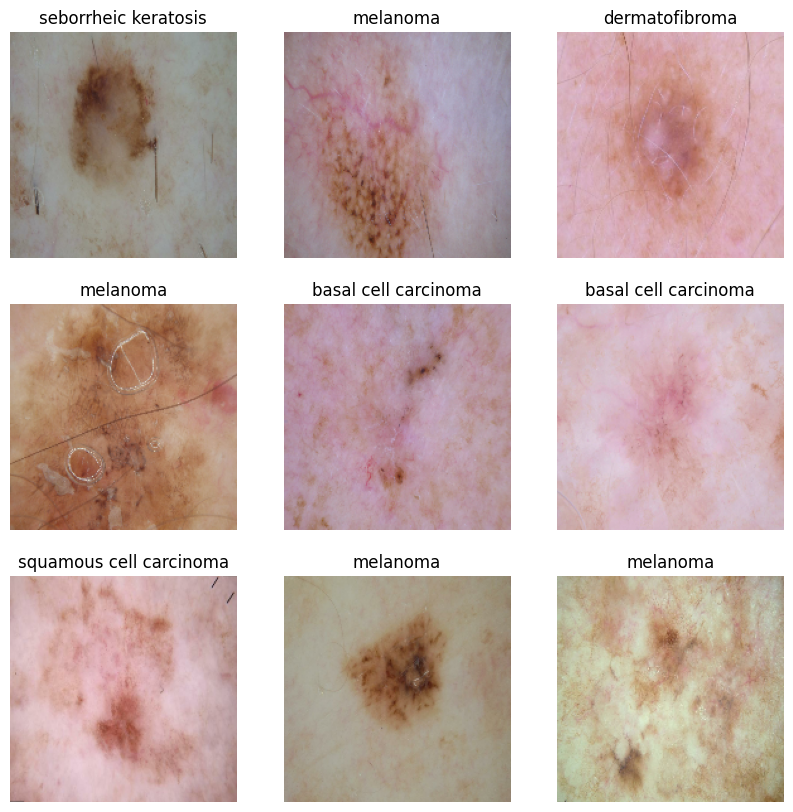

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [27]:
### Your code goes here
model =  Sequential()

#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# conv layer

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation('softmax'))



In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 176, 176, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 176, 176, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 86, 86, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 86, 86, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      57,803,264 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 57,874,217 (220.77 MB)

 Trainable params: 57,873,833 (220.77 MB)

 Non-trainable params: 384 (1.50 KB)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [29]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
accuracy = model.evaluate(train_ds)

print(accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 182s 22ms/step - accuracy: 0.0967 - loss: 2.2165
[2.2171897888183594, 0.09959198534488678]


In [30]:
# View the summary of all layers
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 178, 178, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 178, 178, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 176, 176, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 176, 176, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 176, 176, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 88, 88, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 86, 86, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 86, 86, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 86, 86, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 84, 84, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 84, 84, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 84, 84, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      57,803,264 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 57,874,217 (220.77 MB)

 Trainable params: 57,873,833 (220.77 MB)

 Non-trainable params: 384 (1.50 KB)

None


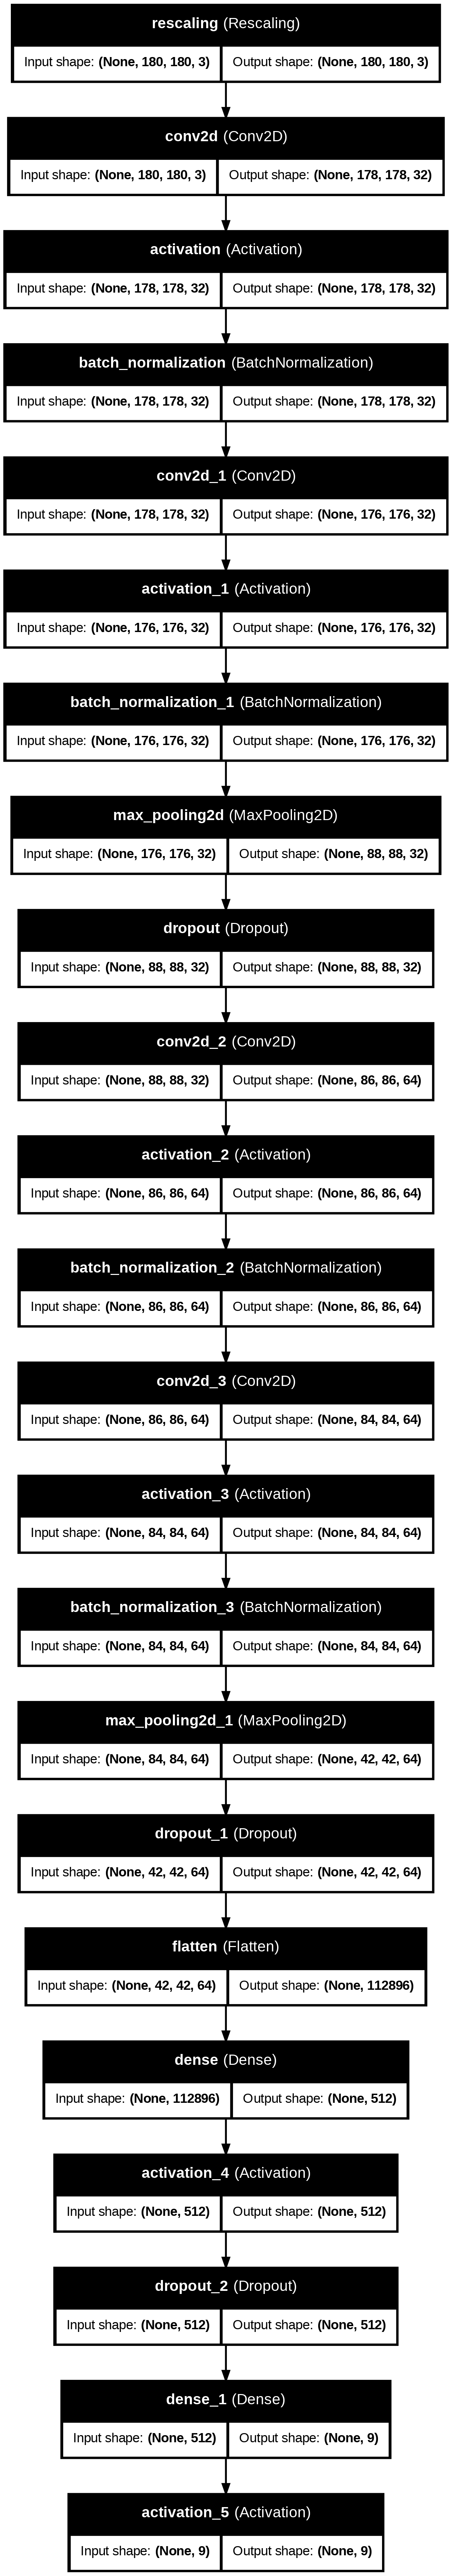

In [ ]:
# visualization
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train the model

In [31]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.2544 - loss: 8.3362 - val_accuracy: 0.1053 - val_loss: 7.7245
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.4683 - loss: 1.4547 - val_accuracy: 0.1474 - val_loss: 4.9234
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5860 - loss: 1.1371 - val_accuracy: 0.3579 - val_loss: 2.9480
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.6456 - loss: 0.9690 - val_accuracy: 0.3684 - val_loss: 4.4298
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.6851 - loss: 0.8562 - val_accuracy: 0.3368 - val_loss: 4.0508
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7488 - loss: 0.6937 - val_accuracy: 0.3684 - val_loss: 3.9650
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.7568 - loss: 0.6555 - val_accuracy: 0.4105 - val_loss: 4.0420
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8062 - loss: 0.5356 - val_ac

### Visualizing training results

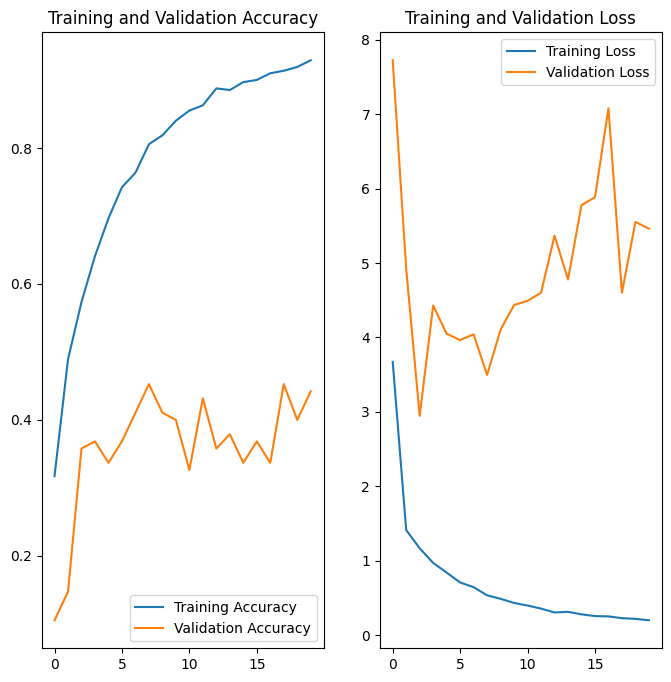

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [ ]:
!pip install Augmentor

In [11]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# current graph show clear presence of overfit

# Your code goes here

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizonal",input_shape=(180,180,3)),
  layers.RandomRotation(0.4),
  layers.RandomZoom(0.4),
  layers.RandomCrop(img_height,img_width),
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


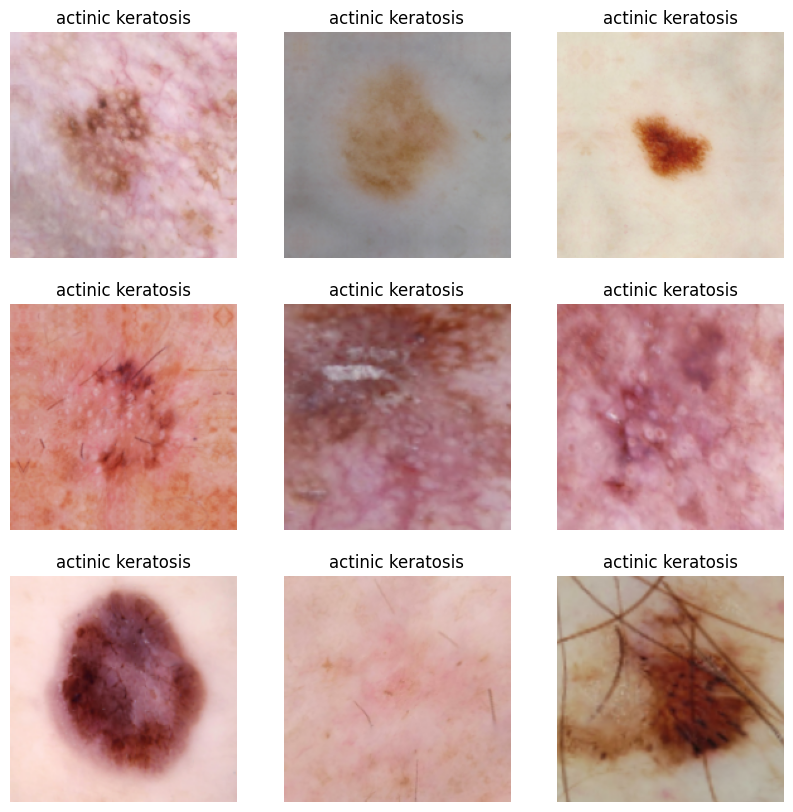

In [13]:
plt.figure(figsize=(10, 10))
for image in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(image)
    #augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(augmented_image[0][i])
    ax.imshow(augmented_image[i].numpy().astype("uint8"))
    ax.axis("off")
    plt.title(class_names[0])

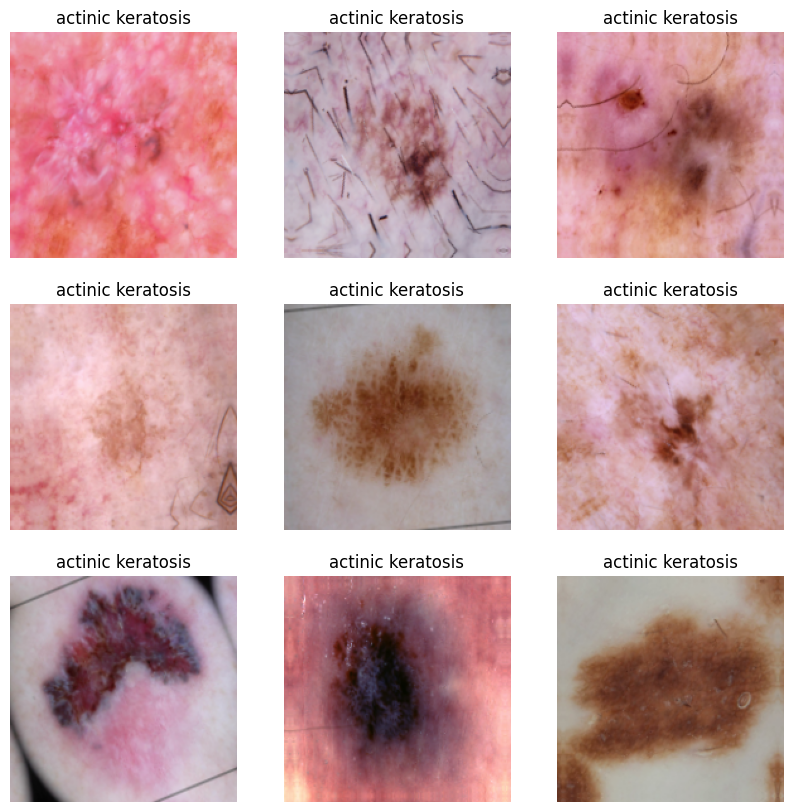

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image in train_ds.take(1):
  for i in range(9):
    augmented_image = data_augmentation(image)
    #augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    #plt.imshow(augmented_image[0][i])
    ax.imshow(augmented_image[i].numpy().astype("uint8"))
    ax.axis("off")
    plt.title(class_names[0])



### Todo:
### Create the model, compile and train the model


In [14]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
model =  Sequential()


# Add Augmented data
model.add(data_augmentation)

#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# conv layer

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(256,(3,3)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(512))
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation('softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model

In [15]:
## Your code goes here

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

accuracy = model.evaluate(train_ds)

print(accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1578 - loss: 2.1982
[2.1975035667419434, 0.16060830652713776]


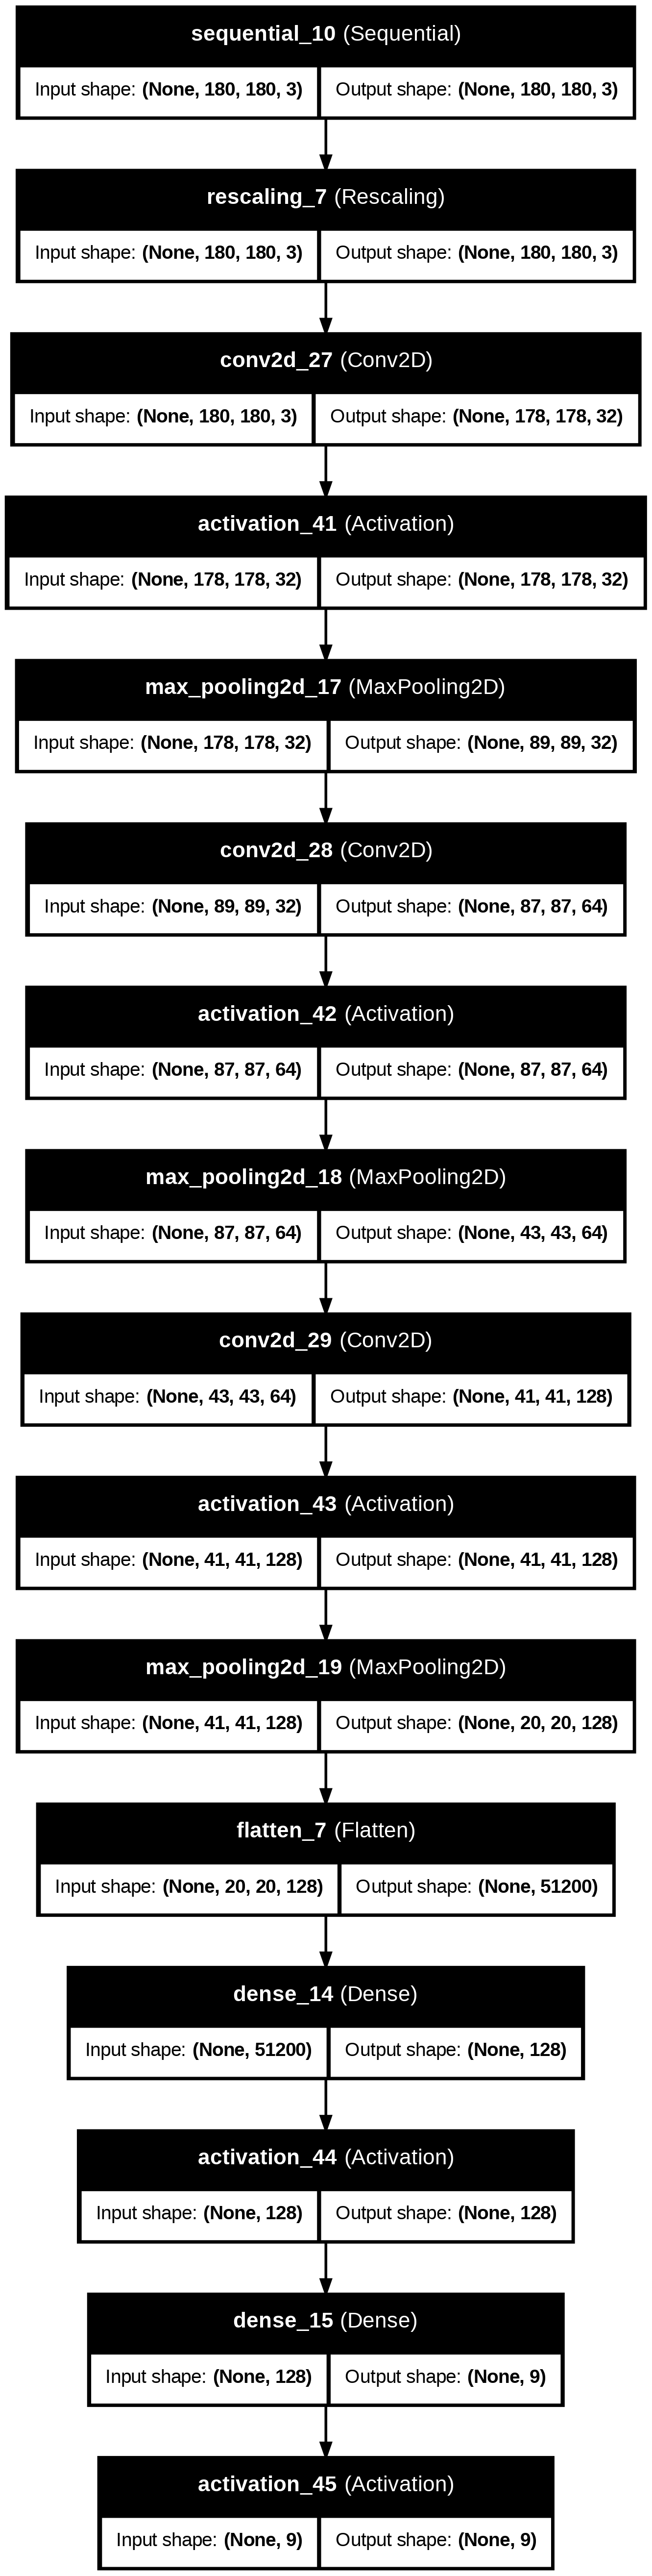

In [ ]:
# visualization
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Training the model

In [16]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.1463 - loss: 2.1855 - val_accuracy: 0.1579 - val_loss: 2.1498
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1876 - loss: 2.1408 - val_accuracy: 0.1368 - val_loss: 2.1821
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2326 - loss: 2.0430 - val_accuracy: 0.2421 - val_loss: 2.0269
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2674 - loss: 1.9453 - val_accuracy: 0.2211 - val_loss: 1.9836
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2830 - loss: 1.8942 - val_accuracy: 0.2316 - val_loss: 1.9195
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3222 - loss: 1.8050 - val_accuracy: 0.3368 - val_loss: 1.8950
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3458 - loss: 1.7346 - val_accuracy: 0.3158 - val_loss: 1.9196
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3571 - loss: 1.7047 - val_accuracy: 

### Visualizing the results

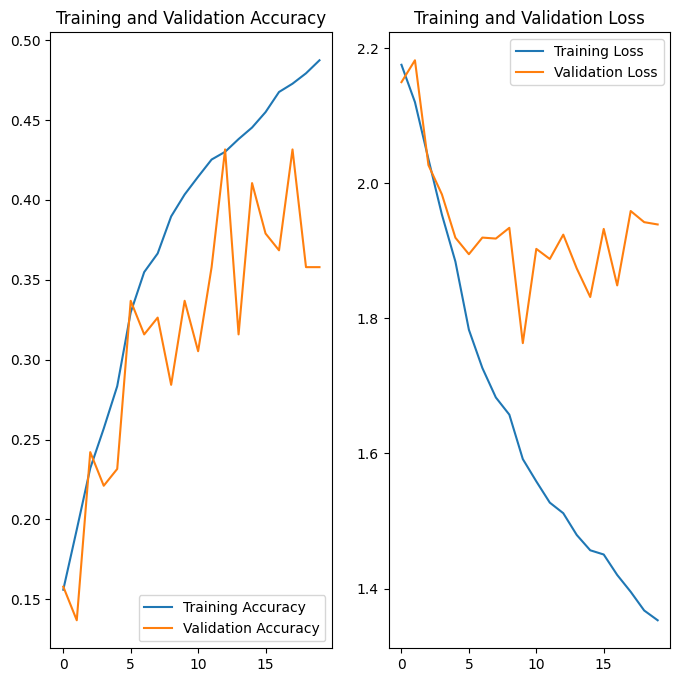

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [18]:
path_list=[]
label_list=[]
for i in class_names:
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        label_list.append(i)
dataframe_dict_original = dict(zip(path_list, label_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


Path              Label
0     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
1     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
2     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
3     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
4     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
...                                                 ...                ...
2234  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2235  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2236  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2237  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2238  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion

[2239 rows x 2 columns]

In [ ]:
## Your code goes here.



path_list = []

label_list = []

for i in class_names:
  for j in data_dir_train.glob(i+'/*.jpg'):
    path_list.append(str(j))
    label_list.append(i)

dataframe_dict = dict(zip(path_list, label_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df


Path              Label
0     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
1     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
2     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
3     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
4     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
...                                                 ...                ...
2234  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2235  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2236  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2237  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
2238  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion

[2239 rows x 2 columns]

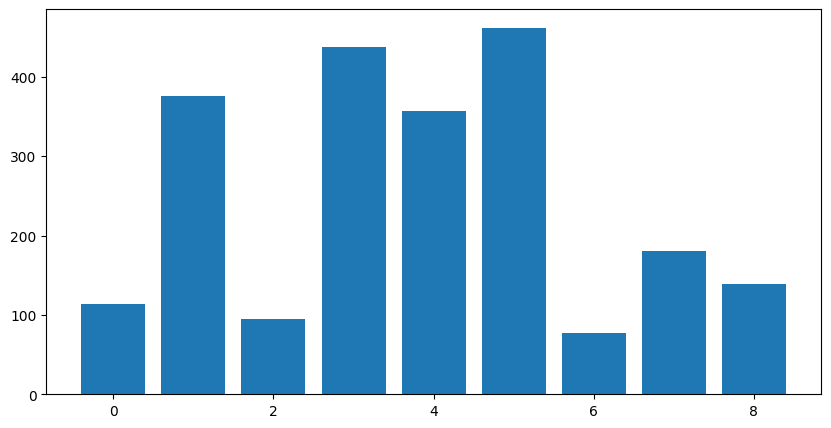

In [19]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
plt.figure(figsize=(10,5))
y = original_df['Label']
y = LabelEncoder().fit_transform(y)
counter=Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

-->> Seborrheic kerotosis

#### - Which classes dominate the data in terms proportionate number of samples?
-->> Pingmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset="/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1EE2B61E10>: 100%|██████████| 500/500 [00:04<00:00, 111.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1D8D3BB190>: 100%|██████████| 500/500 [00:04<00:00, 116.05 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1E90317D60>: 100%|██████████| 500/500 [00:04<00:00, 116.33 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B1D8D2BFE20>: 100%|██████████| 500/500 [00:14<00:00, 34.02 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7B1D8D2A2620>: 100%|██████████| 500/500 [00:13<00:00, 37.82 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1D8C2103A0>: 100%|██████████| 500/500 [00:05<00:00, 97.12 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7B1D8C2F2D70>: 100%|██████████| 500/500 [00:06<00:00, 72.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1D8D3F28F0>: 100%|██████████| 500/500 [00:04<00:00, 106.95 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B1D8D11CC10>: 100%|██████████| 500/500 [00:04<00:00, 112.72 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [20]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [22]:
from glob import glob

In [23]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026149.jpg_c1665a0f-76e3-4244-af49-491ef7656235.jpg',
 '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_61533239-9c6e-499d-9f5c-f3540b76b7a2.jpg',
 '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_038717ac-8d1d-4f0a-9f95-2c5f98d54426.jpg',
 '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027334.jpg_dde50edc-1918-47a4-8645-4b7896b0479a.jpg',
 '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028063.jpg_a7d58a96-9386-4562-82dc-2fe84afe784f.jpg',
 '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC

In [24]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [25]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
print(dataframe_dict_new)

{'/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026149.jpg_c1665a0f-76e3-4244-af49-491ef7656235.jpg': 'actinic keratosis', '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_61533239-9c6e-499d-9f5c-f3540b76b7a2.jpg': 'actinic keratosis', '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_038717ac-8d1d-4f0a-9f95-2c5f98d54426.jpg': 'actinic keratosis', '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027334.jpg_dde50edc-1918-47a4-8645-4b7896b0479a.jpg': 'actinic keratosis', '/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028063.jpg_a7d58a96-9386-4562-82dc-2fe84afe784f.jpg': 'actinic keratosis', '/content/gdrive/My

In [26]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = [original_df, df2]

new_df = pd.concat(new_df)
display(new_df)


Path              Label
0     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
1     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
2     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
3     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
4     /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...  actinic keratosis
...                                                 ...                ...
4495  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
4496  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
4497  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
4498  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion
4499  /content/gdrive/MyDrive/ML/CNN_assignment/2_sk...    vascular lesion

[6739 rows x 2 columns]

In [27]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [28]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [29]:
data_dir_train="/content/gdrive/MyDrive/ML/CNN_assignment/2_skin_cancer/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [30]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [31]:
## your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

### Your code goes here
model =  Sequential()


# Add Augmented data
#model.add(data_augmentation)

#model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# conv layer

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(256,(3,3)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(512))
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(9))
model.add(Activation('softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [32]:
## your code goes here
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

accuracy = model.evaluate(train_ds)

print(accuracy)

169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.0859 - loss: 2.2026
[2.201700210571289, 0.08438427001237869]


#### **Todo:**  Train your model

In [33]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 94s 541ms/step - accuracy: 0.1387 - loss: 2.1822 - val_accuracy: 0.1403 - val_loss: 2.1822
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.1765 - loss: 2.1459 - val_accuracy: 0.1633 - val_loss: 2.1053
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.2099 - loss: 2.0727 - val_accuracy: 0.3378 - val_loss: 1.9086
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.2664 - loss: 1.9671 - val_accuracy: 0.2918 - val_loss: 1.8420
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.3123 - loss: 1.8641 - val_accuracy: 0.3801 - val_loss: 1.6730
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.3489 - loss: 1.7659 - val_accuracy: 0.3779 - val_loss: 1.7161
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.3746 - loss: 1.7032 - val_accuracy: 0.2509 - val_loss: 2.1976
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.3845 - loss: 1.6602 -

#### **Todo:**  Visualize the model results

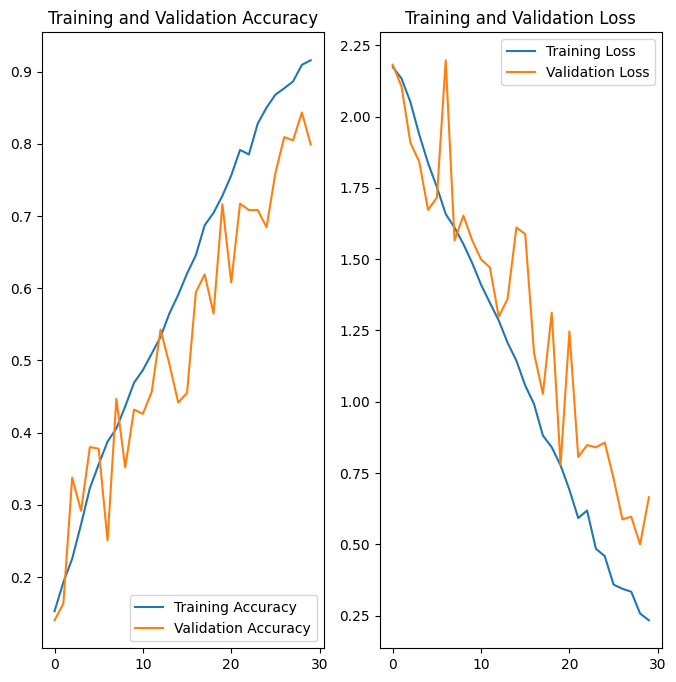

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
Yes class imbance did help to rid of the underfitting / overfitting